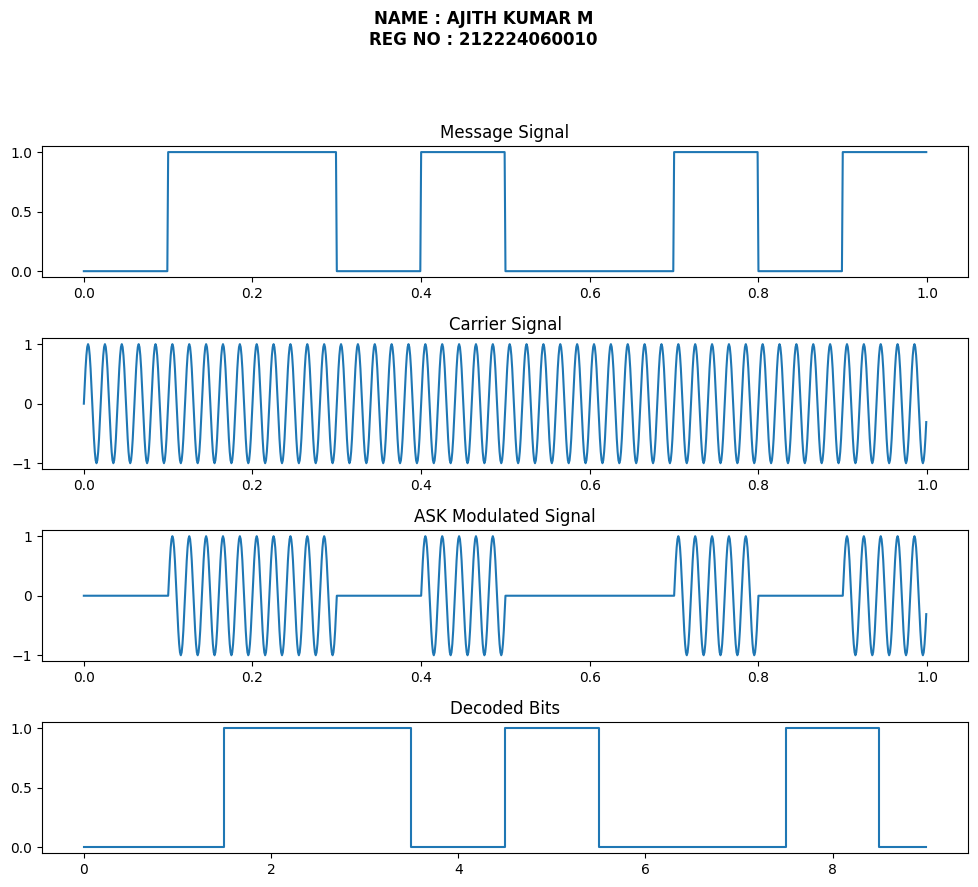

In [8]:
#NAME : AJITH KUMAR M
#REG NO : 212224060010
#EXP NO : 4
#EXP NAME :ASK

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Low-pass filter
def lpf(x, fc, fs):
    b, a = butter(4, fc/(0.5*fs), 'low')
    return lfilter(b, a, x)

# Parameters
fs, fc, br, T = 1000, 50, 10, 1
t = np.arange(0, T, 1/fs)

# Message signal
bits = np.random.randint(0, 2, br)
msg = np.repeat(bits, fs//br)

# Carrier signal
carrier = np.sin(2*np.pi*fc*t)

# ASK modulation & demodulation
ask = msg * carrier
demod = lpf(ask * carrier, fc, fs)
decoded = (demod[::fs//br] > 0.25).astype(int)

# Plot
plt.figure(figsize=(10,9))
plt.suptitle("NAME : AJITH KUMAR M\nREG NO : 212224060010",
             fontsize=12, fontweight='bold')

plt.subplot(4,1,1)
plt.plot(t, msg)
plt.title("Message Signal")

plt.subplot(4,1,2)
plt.plot(t, carrier)
plt.title("Carrier Signal")

plt.subplot(4,1,3)
plt.plot(t, ask)
plt.title("ASK Modulated Signal")

plt.subplot(4,1,4)
plt.step(range(len(decoded)), decoded, where='mid')
plt.title("Decoded Bits")

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()


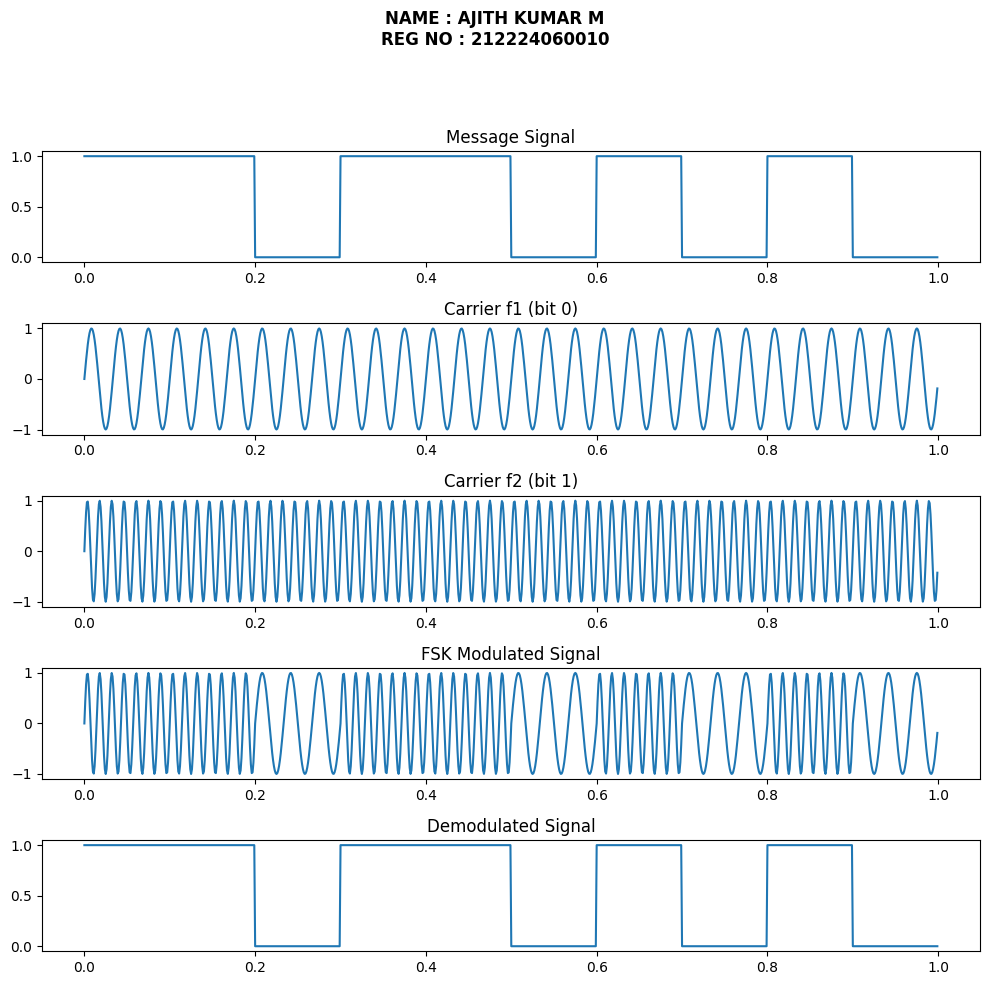

In [9]:
#NAME : AJITH KUMAR M
#REG NO : 212224060010
#EXP NO : 4
#EXP NAME : FSK

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Low-pass filter
def lpf(x, fc, fs):
    b, a = butter(4, fc/(0.5*fs), 'low')
    return lfilter(b, a, x)

# Parameters
fs, f1, f2, br, T = 1000, 30, 70, 10, 1
t = np.arange(0, T, 1/fs)
bd = fs // br

# Message signal
bits = np.random.randint(0, 2, br)
msg = np.repeat(bits, bd)

# Carrier signals
c1 = np.sin(2*np.pi*f1*t)
c2 = np.sin(2*np.pi*f2*t)

# FSK Modulation
fsk = np.zeros_like(t)
for i, b in enumerate(bits):
    fsk[i*bd:(i+1)*bd] = np.sin(2*np.pi*(f2 if b else f1)*t[i*bd:(i+1)*bd])

# Demodulation (correlation)
d1 = lpf(fsk * c1, f1, fs)
d2 = lpf(fsk * c2, f2, fs)

dec = [(np.sum(d2[i*bd:(i+1)*bd]**2) >
        np.sum(d1[i*bd:(i+1)*bd]**2)) for i in range(br)]
demod = np.repeat(dec, bd)

# Plot
plt.figure(figsize=(10,10))
plt.suptitle("NAME : AJITH KUMAR M\nREG NO : 212224060010",
             fontsize=12, fontweight='bold')

plt.subplot(5,1,1); plt.plot(t, msg); plt.title("Message Signal")
plt.subplot(5,1,2); plt.plot(t, c1); plt.title("Carrier f1 (bit 0)")
plt.subplot(5,1,3); plt.plot(t, c2); plt.title("Carrier f2 (bit 1)")
plt.subplot(5,1,4); plt.plot(t, fsk); plt.title("FSK Modulated Signal")
plt.subplot(5,1,5); plt.plot(t, demod); plt.title("Demodulated Signal")

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()
